In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)
pd.option_context('display.max_rows', 50)

import prepare_tsa
import prepare

# Acquisition

In [2]:
# get the data
intakes = pd.read_csv('aac_intakes_20220304.csv')
outcomes = pd.read_csv('aac_outcomes_20220304.csv')

# Preparation

In [3]:
def prep_for_tsa(df):
    for col in df.columns:
        df = df.rename(columns={col: col.lower().replace(' ', '_')})
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.set_index('datetime')
    df = df.resample('D').count()[['animal_id']]
    df.index.name = 'intake_date'
    df.columns = ['intake_count']
    return df

In [4]:
intakes = prep_for_tsa(intakes)

In [9]:
outcomes = prep_for_tsa(outcomes)

# Exploration

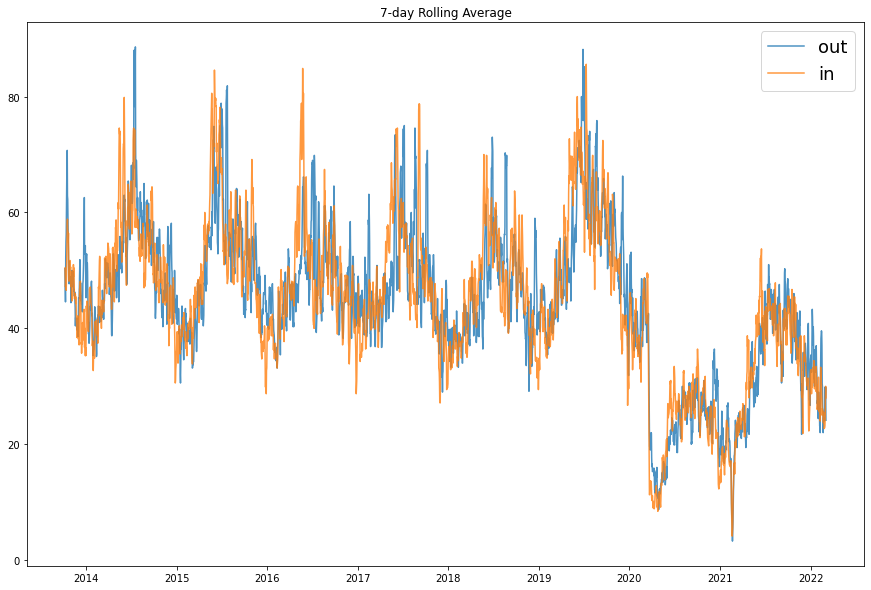

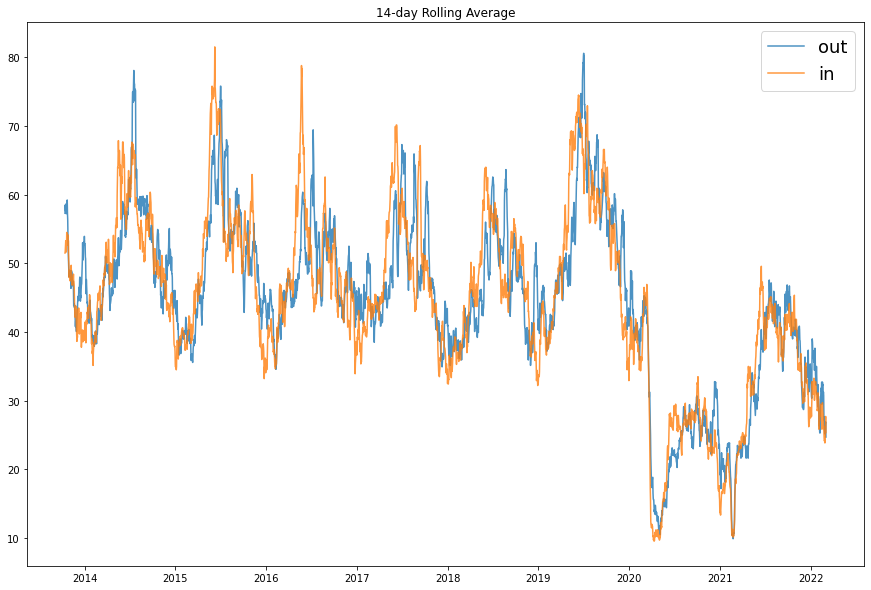

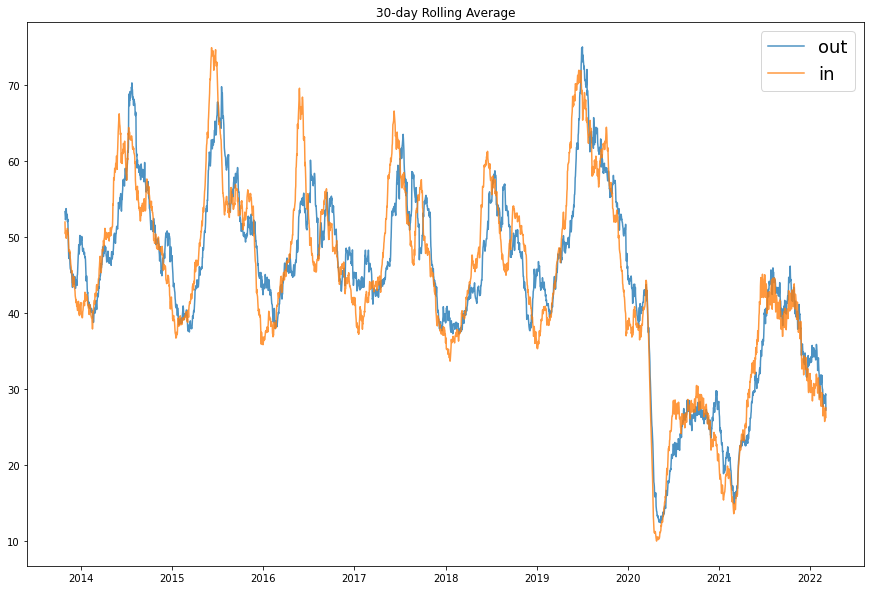

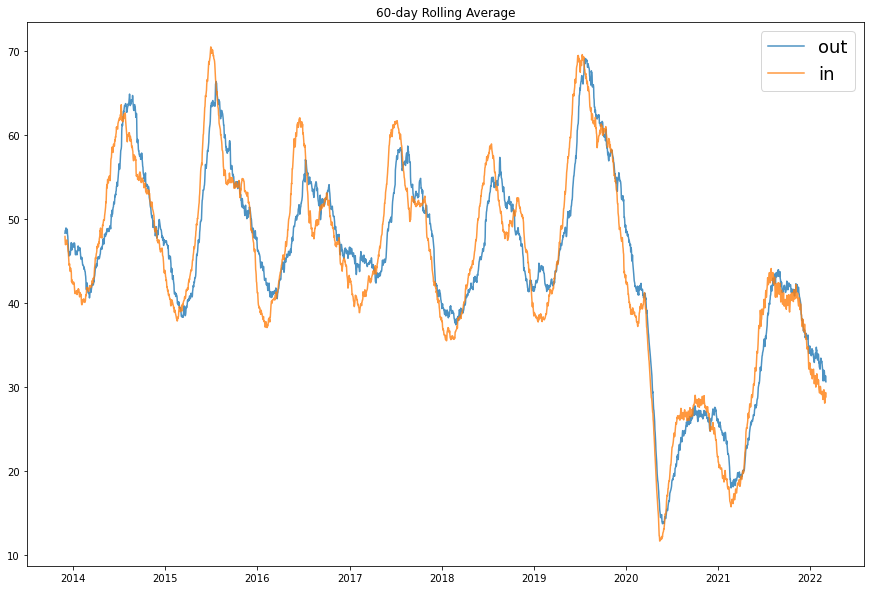

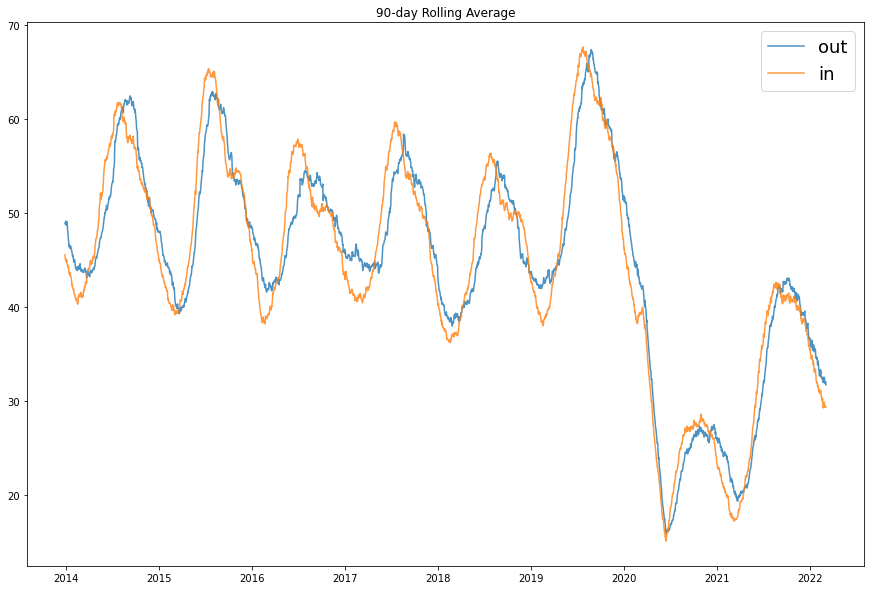

In [53]:
periods = [7, 14, 30, 60, 90]

for period, alpha in zip(periods, alphas):
    
    plt.figure(figsize=(15,10))
    plt.plot(outcomes.rolling(period).mean(), label='out', alpha=.8)
    plt.plot(intakes.rolling(period).mean(), label='in', alpha=.8)
    plt.title(f'{period}-day Rolling Average')
    plt.legend(fontsize=18)
    plt.show()

# Modeling